In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용 함수

In [65]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = '연령대'):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    for i, df in enumerate(df_list):
        age_counts = df[colname].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [66]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [115]:
# 두 집단의 범주 차이 비교

def age_compare_(category_col_1, category_col_2, category_name, df1 = capital_2030, df2 = capital_4050):

    fig, ax = plt.subplots(1,2,figsize = (14,6))

    sns.barplot(x = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[0])
    #ax[0].pick_params(axis = 'x', rotation = 45)
    ax[0].set_title(f"{category_col_2}, {category_name} Barplot Of df1")

    sns.barplot(x = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[1])
    #ax[1].pick_params(axis = 'x', rotation = 45)
    ax[1].set_title(f"{category_col_1}, {category_name} Barplot Of df2")

    plt.tight_layout()
    plt.show()

# 데이터 로딩 및 전처리

In [67]:
data_21 = pd.read_csv('sampled_data/card_base_2021.csv')
data_22 = pd.read_csv('sampled_data/card_base_2022.csv')
data_23 = pd.read_csv('sampled_data/card_base_2023.csv')

In [68]:
# 데이터 가맹점 기준 수도권으로 분류

capital_21 = data_21[data_21['가맹점_광역시도'].isin(['서울특별시', '경기도'])]
capital_22 = data_22[data_22['가맹점_광역시도'].isin(['서울특별시', '경기도'])]
capital_23 = data_23[data_23['가맹점_광역시도'].isin(['서울특별시', '경기도'])]

In [69]:
# 승인건수 범주화

mapping = {
    '5번이하': 5,
    '5번초과 10번이하': 10,
    '10번초과 15번이하': 15,
    '15번초과 20번이하': 20,
    '20번 초과': 25
}

# 특정 칼럼을 수치화 해주는 함수 - 쓰려면 매핑 수정 필수적!!
def cartegory_to_int_columns(df, colname, map = mapping):
    df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)
    print('수치화 완료')

cartegory_to_int_columns(capital_21, '승인건수')
cartegory_to_int_columns(capital_22, '승인건수')
cartegory_to_int_columns(capital_23, '승인건수')

수치화 완료
수치화 완료
수치화 완료


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\200683854.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\200683854.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\200683854.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [70]:
# Datetime으로 만들어주는 코드

def datetime_quater(df, colname):

    for i in colname:
        df[i] = pd.to_datetime(df[i].astype(int).astype(str), format = '%Y%m')
        df[f'{i}_분기'] = df[i].dt.quarter
        print(f'{i}의 타입은: {df[i].dtype}')
        print(f'{i}_분기 생성됨!')

datetime_quater(capital_21, ['거래년월'])
datetime_quater(capital_22, ['거래년월'])
datetime_quater(capital_23, ['거래년월'])

거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\2300631196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_datetime(df[i].astype(int).astype(str), format = '%Y%m')
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\2300631196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i}_분기'] = df[i].dt.quarter
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\2300631196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [71]:
capital_21['년도'] = 2021
capital_22['년도'] = 2022
capital_23['년도'] = 2023

capital_data = pd.concat([capital_21,capital_22,capital_23], axis = 0)

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\1551777910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_21['년도'] = 2021
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\1551777910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_22['년도'] = 2022
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_10468\1551777910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [72]:
capital_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833537 entries, 18 to 1388530
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   거래년월      833537 non-null  datetime64[ns]
 1   고객ID      833537 non-null  int64         
 2   가맹점업종명    833537 non-null  object        
 3   가맹점_광역시도  833537 non-null  object        
 4   가맹점_시군구   833537 non-null  object        
 5   승인건수      833537 non-null  object        
 6   승인금액      833537 non-null  int64         
 7   연령대       833537 non-null  object        
 8   성별        833537 non-null  object        
 9   고객등급      833537 non-null  object        
 10  자택_시도     833537 non-null  object        
 11  자택_시군구    833537 non-null  object        
 12  승인건수_수치화  833537 non-null  int64         
 13  거래년월_분기   833537 non-null  int32         
 14  년도        833537 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(9)
memory usage: 98.6+ MB


In [73]:
capital_data.head()

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,년도
18,2021-01-01,8219466848,CATV홈쇼핑,서울특별시,강동구,5번이하,50000,50대,여,일반등급,대구광역시,달서구,5,1,2021
19,2021-01-01,8547857796,CATV홈쇼핑,서울특별시,강동구,5번이하,130000,60대이상,여,일반등급,대구광역시,서구,5,1,2021
20,2021-01-01,8866337230,CATV홈쇼핑,서울특별시,강동구,5번이하,70000,50대,여,일반등급,대구광역시,달서구,5,1,2021
21,2021-01-01,7466146751,CATV홈쇼핑,서울특별시,강동구,5번이하,170000,60대이상,여,일반등급,대구광역시,북구,5,1,2021
22,2021-01-01,9415294007,CATV홈쇼핑,서울특별시,강동구,5번이하,100000,50대,여,일반등급,대구광역시,달서구,5,1,2021


# 가맹점업종 업종별로 범주화
- 4개 ~ 5개 정도 범주로 설정하자

In [74]:
#수정사항
#아무리 봐도 편의점은 음식관련이 맞다
#비슷한 이유로 농축수산품, 농축협직영매장도 식품관련으로
#갈비전문점, 이륜차판매가 뉴페이스긴 한데 각각 1개씩이라 의미가 없어도 너무 없음 -> 기타로 보냄

food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품', 
]

retail_goods = [
    '가 방', '가전제품', '기타 사무용품', '기타가구', '기타의류', '기타잡화', '기타전기제품', '내의판매', '당구장', '대형할인점', 
    '목재·석재·철물', '문구용품', '세탁소', '소프트웨어', '슈퍼마켓', '스포츠·레져용품', '스포츠의류', '신 발', '안경', '액세서리', '의료용품', '일반가구', 
    '일반서적', '자동차부품', '자동차정비', '정수기', '정장', '종합용역', '주방용구', '주방용식기', '출판 및 인쇄물', '치과의원', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', '화장품', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '이용원', '자동차시트·타이어', '침구·수예점', '미곡상', '비료,사료,종자', '아동의류', 
    '화방·표구점', '귀금속', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽'
]

service = [
    '1급 호텔', '가례서비스업', '골프경기장', '골프연습장', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스', '기타레져업소', 
    '동물병원', '레져업소', '미용원', '미용재료', '보습학원', '사무서비스', '영화관', '외국어학원', '조세서비스', '종합병원', '통신서비스/소득공제비대상', '특급호텔', 
    '피부미용실', '학원', '헬스클럽', '예·체능계학원', '기능학원', '스크린골프', '한방병원', '2급 호텔', '치과병원', '혼례서비스업', '안마/스포츠마사지', 
    '종합레져타운', '기타숙박업', '기타의료기관 및 기타의료기기', '독서실', '병 원(응급실운영)', '보관및 창고업', '비씨카드 정산용(할인)', '기타 교육기관', 
    '학습지교육', '문화취미기타', '관광여행', '수족관', '초중고교육기관', '위탁급식업', '한 의 원', '콘도', '상품권전문판매', '부동산중개·임대', 
    '노 래 방', '이동통신요금', '인터넷Mall', '인터넷종합Mall', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점', '수 영 장', '약 국', '연 쇄 점', '완구점', 
    '유아원', '의 원', 'CATV홈쇼핑', 'PG상품권', '가정용품수리', '건강진단', '골프용품 전문점', '구내매점(국가기관등)', '손해보험', 'CATV', '전자상거래상품권전문판매', 
    '위성방송', '주류판매점', '애완동물', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '사우나', '상 품 권', '생명보험', '세차장', 
    '주차장', '볼 링 장', '자사카드발행백화점', '전문서적', '전자상거래상품권'
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']

In [75]:
'''
food_related = [
    '제과점', '정육점', '서양음식', '일반한식', '스넥', '중국식', '일식·회집', '갈비전문점', '한정식', '카페', '주점', '칵테일바', '주류판매점', '유흥주점', '단란주점', '위탁급식업', '기타음료식품'
]

retail_goods = [
    '슈퍼마켓', '대형할인점', '농·축·수산품', '문구용품', '약 국', '화장품', '가방', '완구점', '스포츠·레져용품', '의류', '액세서리', '가전제품', '일반서적', '기념품점', '농축수산가공품', '기타잡화', '침구·수예점', '내의판매', '아동의류', '화원', '가정용품수리', '신발', '사무용 OA기기', '골프용품 전문점'
]

service = [
    '병원(응급실운영)', '미용원', '피부미용실', '사우나', '헬스클럽', '보습학원', '예·체능계학원', '당구장', '골프경기장', '골프연습장', '볼링장', '스크린골프', '레져업소', '종합레져타운', '영화관', '노래방', '종합병원', '한방병원', '안마/스포츠마사지', '치과병원', '동물병원'
]

transportation = [
    '주유소', 'GS가스충전소', 'SK주유소', '현대정유(오일뱅크)', '화물운송', '자동차정비', '자동차부품', '택시', '렌터카', '전기차충전소', '고속버스', '항공사', '철도', '여객선', '주차장', 'LPG취급점'
]

others = [
    '비영리/대상', '비영리/비대상', '인터넷종합Mall', '통신기기', '통신판매업1', '전자상거래상품권', 'PG상품권', '가례서비스업', '부동산중개·임대', '문화취미기타', '사무서비스', '기타전문점', '공공요금대행서비스', '종합용역', '기타건강식품', '이용원', '농협하나로클럽', 'DP&E', '귀금속', '기타대인서비스', '기타보험', 'CATV홈쇼핑', '소프트웨어', '기타의료기관 및 기타의료기기', '공공요금대행서비스/소득공제대상', '기타4'
]
'''

categorizing_list = [food_related, retail_goods, service, transportation, others]
categorizing_list_name = ['식생활', '소매_및_생활용품', '서비스_및_여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict = {}
for i, clist in enumerate(categorizing_list):
    for item in clist:
        mapping_dict[item] = categorizing_list_name[i]

capital_data['가맹점업종명_범주화'] = capital_data['가맹점업종명'].map(mapping_dict).fillna('인터넷P/G')


## 간단시각화

In [76]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 소비 범주의 시각화

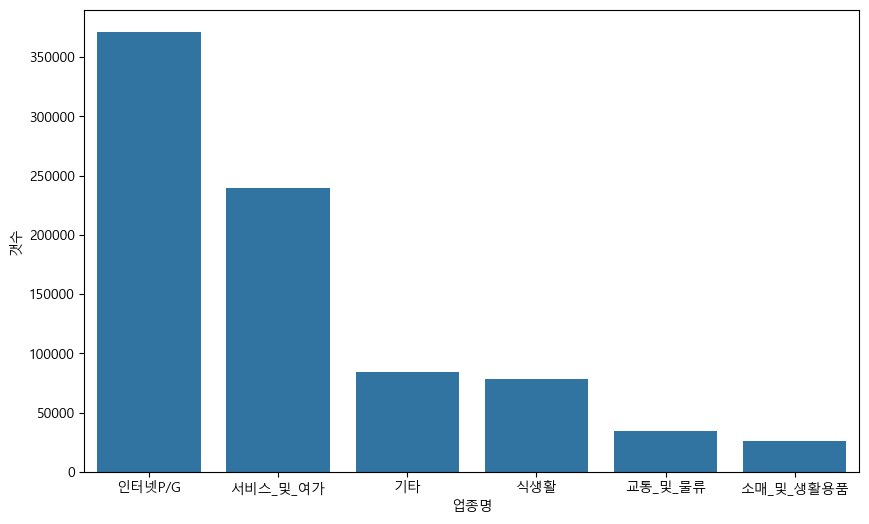

In [114]:
# 비중 시각화로 확인

df = capital_data['가맹점업종명_범주화'].value_counts().reset_index()
df.columns = ['업종명','갯수']

plt.figure(figsize = (10,6))
sns.barplot(x = '업종명', y = '갯수', data = df)
plt.show()

In [78]:
# 나이대로 데이터 분할

capital_2030 = capital_data[capital_data['연령대'].isin(['20대', '30대'])]
capital_4050 = capital_data[capital_data['연령대'].isin(['40대', '50대'])]

## 승인건수가 5번 이하인것과 아닌 것의 가맹점 업종 비율

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '인터넷P/G'),
  Text(1, 0, '서비스_및_여가'),
  Text(2, 0, '기타'),
  Text(3, 0, '식생활'),
  Text(4, 0, '교통_및_물류'),
  Text(5, 0, '소매_및_생활용품')])

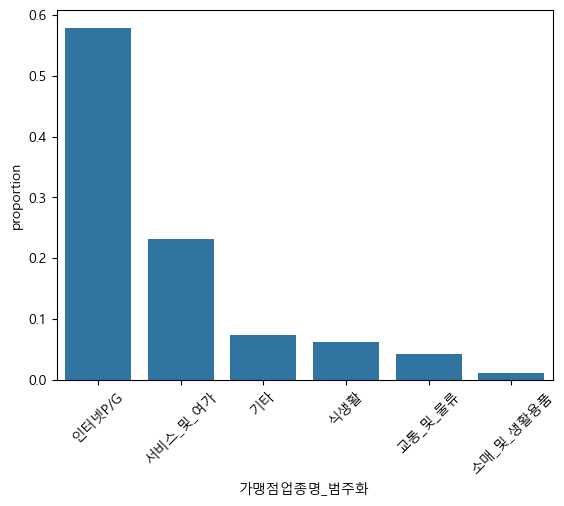

In [79]:
sns.barplot(capital_data[capital_data['승인건수'] != '5번이하']['가맹점업종명_범주화'].value_counts(normalize=True))
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '인터넷P/G'),
  Text(1, 0, '서비스_및_여가'),
  Text(2, 0, '기타'),
  Text(3, 0, '식생활'),
  Text(4, 0, '교통_및_물류'),
  Text(5, 0, '소매_및_생활용품')])

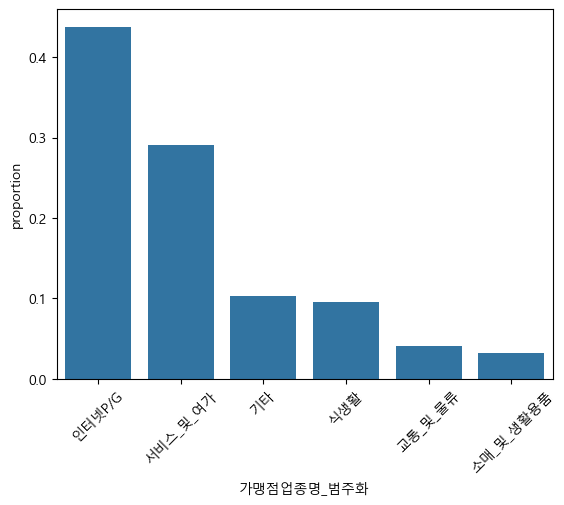

In [80]:
sns.barplot(capital_data[capital_data['승인건수'] == '5번이하']['가맹점업종명_범주화'].value_counts(normalize=True))
plt.xticks(rotation = 45)

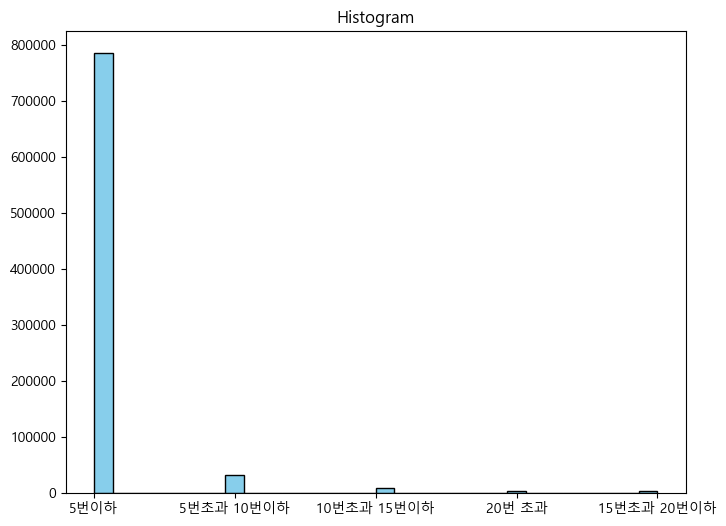

In [81]:
plt.figure(figsize=(8, 6))
plt.hist(capital_data['승인건수'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.show()

# 데이터 재처리

### 문제
- 인터넷P/G에 명백히 인터넷P/G가 아닌 항목들이 섞여있다.
- 다시 재분류가 필요함.

In [88]:
# 문제

tmp = capital_data[['가맹점업종명','가맹점업종명_범주화']][capital_data['가맹점업종명_범주화'] == '인터넷P/G']
tmp.value_counts()

가맹점업종명  가맹점업종명_범주화
인터넷P/G  인터넷P/G        371471
Name: count, dtype: int64

In [89]:
capital_data = capital_data.reset_index(drop=True)
capital_data['가맹점업종명_범주화'].value_counts()

가맹점업종명_범주화
인터넷P/G       371471
서비스_및_여가     239553
기타            84312
식생활           78259
교통_및_물류       34235
소매_및_생활용품     25707
Name: count, dtype: int64

# 외부데이터 Join된것 불러오기
- 현이씨가 대신 해 주심
- 이후 분석은 변수가 붙은 데이터를 중심으로 진행

# EDA
- 더 많은 EDA
- 파생변수를 만들 수 있나 확인해보자

In [90]:
capital_data['가맹점업종명'][capital_data['가맹점업종명_범주화'] == '서비스_및_여가'].value_counts()

가맹점업종명
인터넷종합Mall    71234
이동통신요금       31794
손해보험         20025
인터넷Mall      17529
연 쇄 점        16884
             ...  
동물병원             2
예·체능계학원          2
부동산중개·임대         2
독서실              1
종합레져타운           1
Name: count, Length: 78, dtype: int64

In [106]:
capital_data['가맹점업종명'][capital_data['가맹점업종명_범주화'] == '식생활'].value_counts()

가맹점업종명
서양음식        28987
일반한식        18000
편 의 점       15496
기타음료식품       3787
스넥           3302
제과점          2727
중국식          1897
일식·회집        1610
농·축·수산품       915
주점            725
정육점           439
농,축협직영매장      241
기타건강식품         75
유흥주점           33
칵테일바           24
단란주점            1
Name: count, dtype: int64

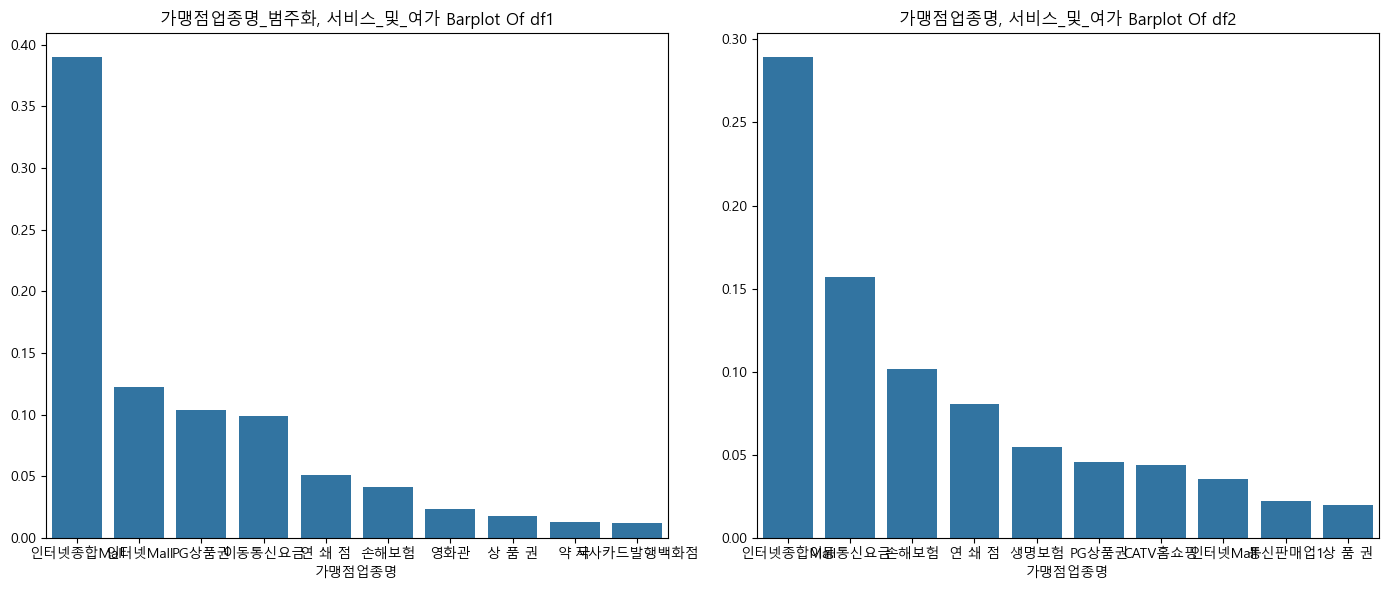

In [116]:
age_compare_('가맹점업종명','가맹점업종명_범주화', '서비스_및_여가')

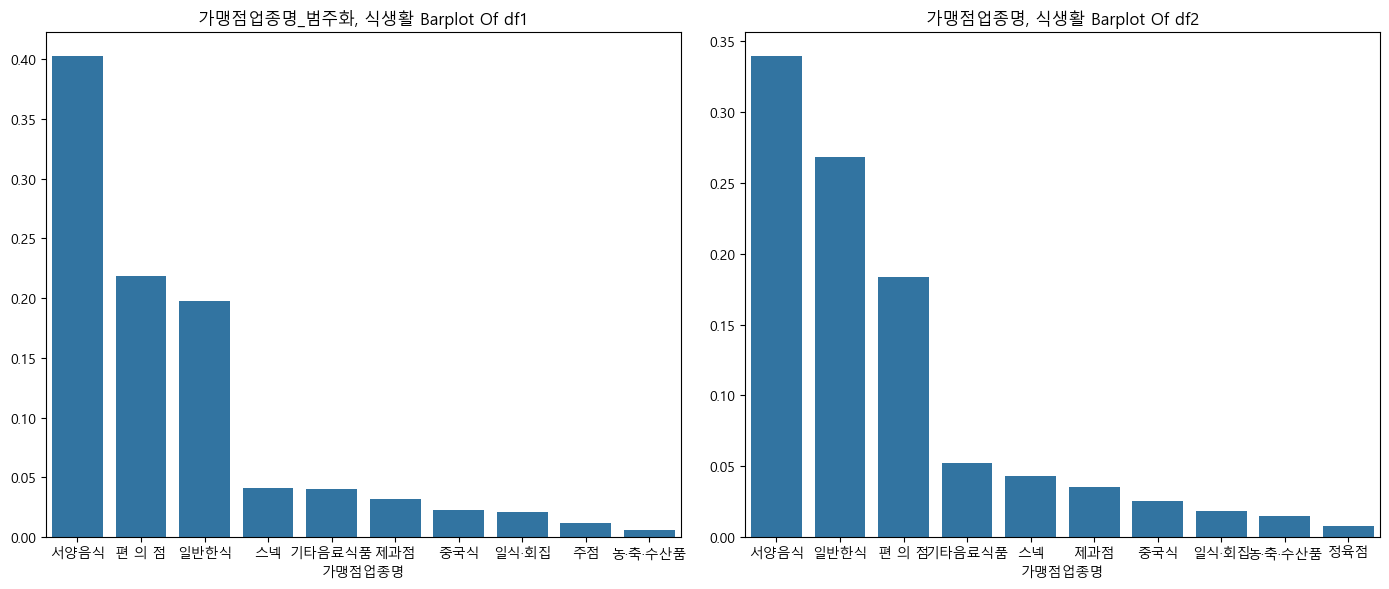

In [105]:
age_compare_('가맹점업종명','가맹점업종명_범주화', '식생활')

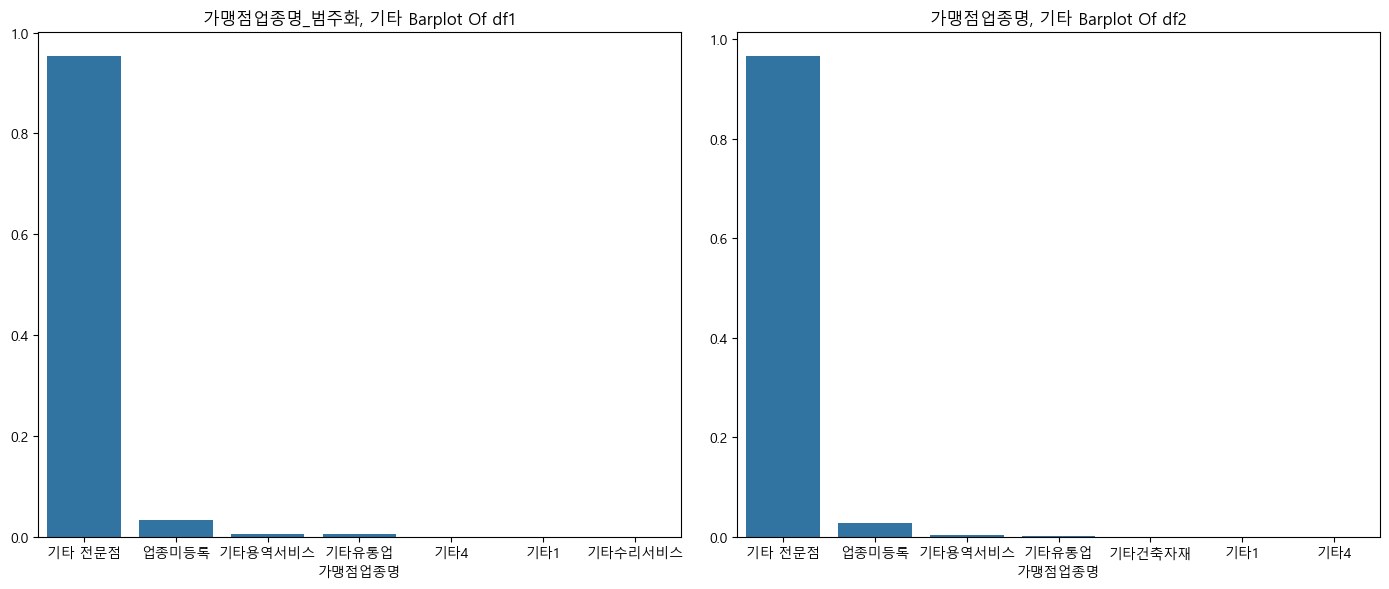

In [107]:
age_compare_('가맹점업종명','가맹점업종명_범주화', '기타')

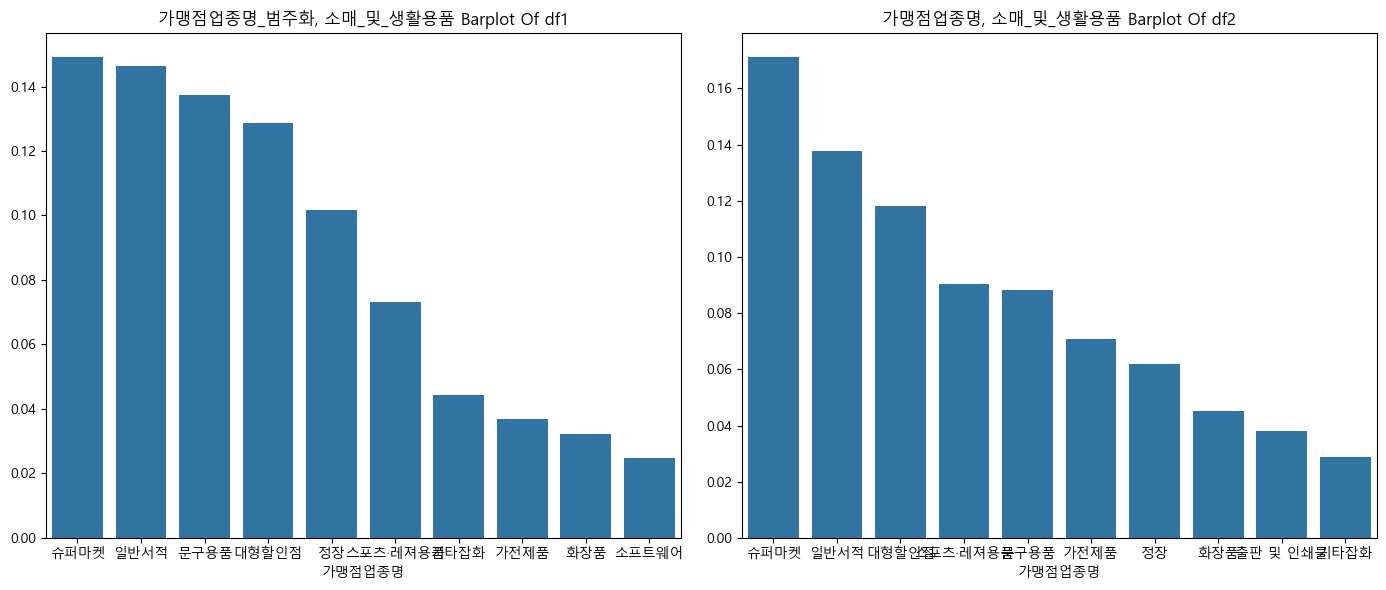

In [108]:
age_compare_('가맹점업종명','가맹점업종명_범주화', '소매_및_생활용품')

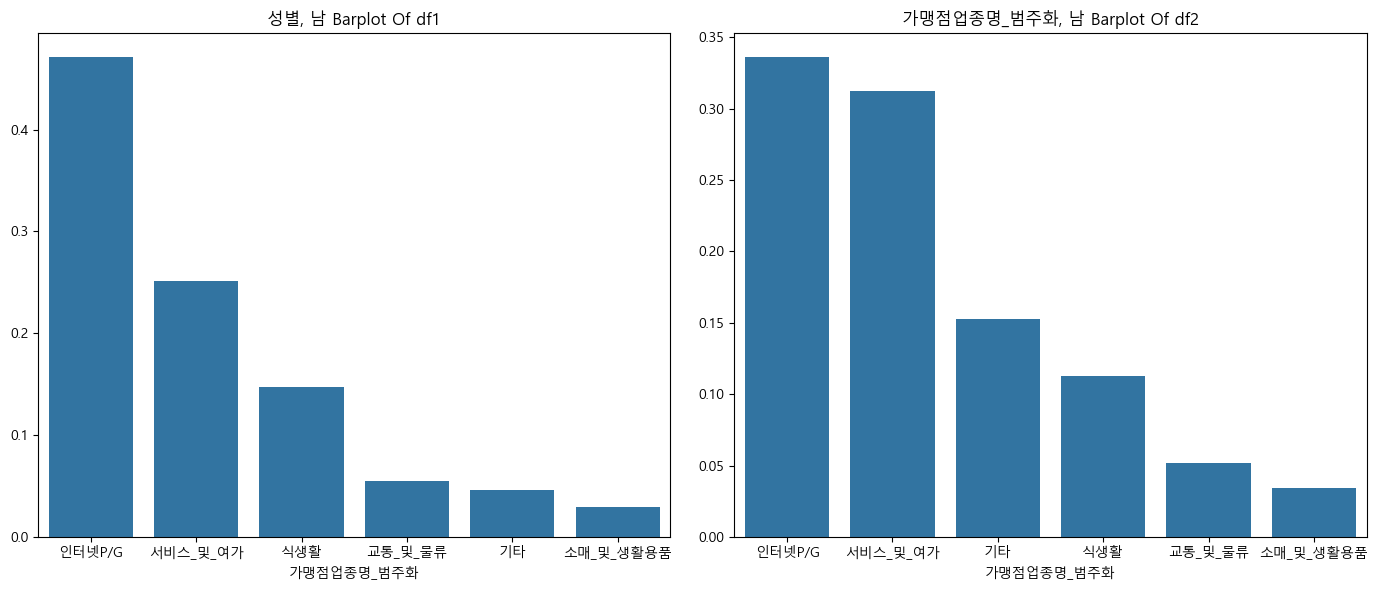

In [113]:
age_compare_('가맹점업종명_범주화','성별', '남')

# 통계분석
- EDA를 기반으로 하자

In [92]:
contingency_capital_2030 = pd.crosstab(capital_2030['가맹점업종명_범주화'],capital_2030['연령대']).reset_index()
contingency_capital_4050 = pd.crosstab(capital_4050['가맹점업종명_범주화'],capital_4050['연령대']).reset_index()
contingency_capital = pd.merge(contingency_capital_2030,contingency_capital_4050, how = 'inner',on = '가맹점업종명_범주화')

contingency_capital['2030'] = contingency_capital['20대'] + contingency_capital['30대']
contingency_capital['4050'] = contingency_capital['40대'] + contingency_capital['50대']

contingency_capital

연령대,가맹점업종명_범주화,20대,30대,40대,50대,2030,4050
0,교통_및_물류,9911,4781,5378,7233,14692,12611
1,기타,6177,7162,14676,28019,13339,42695
2,서비스_및_여가,46154,42472,53410,49513,88626,102923
3,소매_및_생활용품,6408,4099,5046,4865,10507,9911
4,식생활,25242,12251,13222,14182,37493,27404
5,인터넷P/G,100167,78508,80517,53887,178675,134404


In [ ]:
#contingency_capital 로 세대 별 비율 차이 확인 카이제곱 돌리기

# ML 분류모델 만들기 - 승인금액 기준으로
- randomforest를 사용하여 승인 금액을 기준으로 분류해보자.

# capital_data 저장

In [87]:
capital_data.to_csv('sampled_data/capital_data.csv')